・セーフティスタンダートは大事
・散布図行列入れる　どの属性値を使うか宣言
・説明変数は10個くらい

・離散変数　ダミー変数があった場合ジタリング　＋ー0.3
・説明変数間の関係に相関がある　単純散布図は意味を持たない　多重共線性
・価格対他の変数の相関係数をみても意味ない

・調整済み散布図が必要
・価格から馬力の影響を取り除く残差出す
・車両重量から馬力の影響を取り除き残差出す
・２の残差をx軸に1の残差をy軸に
・
・調整済み散布図の判断、高影響点の確認や、原点の周りに残差が散らばってなければ間違い、傾きを見る、傾きをスタンダードエラーで割ったものt値（絶対値で１以下だと変数は有意でない、２以上だと有意、１〜２は考える）、符号条件正（エンジンが大きいと価格高くなると考えられるなど、消費者の行動原理も考えないといけない）
・総排気量を加える場合、馬力と重量を学習させたものを引いて回帰、総排気量と馬力の２つを説明変数にするのは無理そう
・３つのモデルに絞る

・各変数の係数をだし、変数ごとのtvalueを出す、t値の絶対値が２以上であることを示す
・３つのモデルが入れ子のモデルはだめ（１つのモデルの中に他のモデルが含まれること、あらゆる可能性を試してないと思われる）
・モデルはできるだけ簡単な方がいい

・候補変数は馬力と総排気量
・エンジン性能変数とサイズ変数は大事だった、燃費？
・アメリカ人、大きな車好き

・価格はlogとって正規分布にする

・cp基準、x軸に切片項も含めたモデルの項の数y軸にcp value 7-53式 
・フルモデルの説明変数の数とcp valueは一致　フルモデルのcp　valueを計算必須
・飽和モデルのシグマスクエア　7−19式　239(n-p/残差の二乗和

日産nv
レクサスUX
Nv200h
Mbメトリス
スプリンター

使う変数
sixover  displacement awd 4wd_dummie rear suv pickup curb weight length mpg (hp)

# 車の価格を各変数から予測するシンプルな機械学習、統計プロジェクト
# EDAと呼ばれるデータの特徴を見たりするデータ分析のはじめのコード

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv
import codecs
 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

# Pandasでの表示が省略されないように設定
pd.set_option("max_columns", 100)
pd.set_option('max_rows',1000)
pd.set_option('max_info_columns',100)

In [28]:
with codecs.open("Consumer_Reports_2018.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")

In [29]:
df

,Model,Price_as_tested,4spd,6over,cvt,Disp,Hp,AWD,4WD_dummy,rear,SUV,Pickup,Minivan,Sports,Luxuary,Curb Weight(lb),length(inch),MPG_ovarall,Reliability,Electric,Hybrid,Hybrid(option)
0,Acura ILX Premium,31600.0,0,1,0,2.4,201,0,0,0,0,0,0,0,1,3100,182,28,1,0,0,0
1,Acura MDX Tech,51425.0,0,1,0,3.5,290,1,0,0,1,0,0,0,1,4200,196,21,2,0,0,1
2,Acura RDX,40100.0,0,1,0,3.5,279,1,0,0,1,0,0,0,1,3850,184,22,4,0,0,0
3,Acura RLX Tech,58400.0,0,1,0,3.5,310,1,0,0,0,0,0,0,1,3930,198,23,2,0,0,1
4,Acura TLX 2.4L,39375.0,0,1,0,2.4,206,0,0,0,0,0,0,0,1,3480,190,27,2,0,0,0
5,Acura TLX SH-AWD,39375.0,0,1,0,3.5,290,1,0,0,0,0,0,0,1,3750,190,25,2,0,0,0
6,Alfa Romeo 4C,60900.0,0,1,0,1.7,237,0,0,1,0,0,0,1,0,2470,157,28,1,0,0,0
7,Alfa Romeo Giulia,55947.5,0,1,0,2.0,280,1,0,1,0,0,0,0,0,3700,183,27,1,0,0,0
8,Alfa Romeo Stelvio,42995.0,0,1,0,2.0,280,1,0,0,1,0,0,0,0,4020,185,24,1,0,0,0
9,Audi A3 Premium,37800.0,0,1,0,1.4,204,1,0,0,0,0,0,0,1,3140,175,27,3,0,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 22 columns):
Model              270 non-null object
Price_as_tested    270 non-null float64
4spd               270 non-null int64
6over              270 non-null int64
cvt                270 non-null int64
Disp               270 non-null float64
Hp                 270 non-null int64
AWD                270 non-null int64
4WD_dummy          270 non-null int64
rear               270 non-null int64
SUV                270 non-null int64
Pickup             270 non-null int64
Minivan            270 non-null int64
Sports             270 non-null int64
Luxuary            270 non-null int64
Curb Weight(lb)    270 non-null int64
length(inch)       270 non-null int64
MPG_ovarall        270 non-null int64
Reliability        270 non-null int64
Electric           270 non-null int64
Hybrid             270 non-null int64
Hybrid(option)     270 non-null int64
dtypes: float64(2), int64(19), object(1)
memory usage:

In [9]:
df_new = df.loc[df["Price_as_tested"] < 80000]

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 312
Data columns (total 22 columns):
Model              283 non-null object
Price_as_tested    283 non-null float64
4spd               283 non-null int64
6over              283 non-null int64
cvt                283 non-null int64
Disp               283 non-null float64
Hp                 283 non-null int64
AWD                283 non-null int64
4WD_dummy          283 non-null int64
rear               283 non-null int64
SUV                283 non-null int64
Pickup             283 non-null int64
Minivan            283 non-null int64
Sports             283 non-null int64
Luxuary            283 non-null int64
Curb Weight(lb)    280 non-null float64
length(inch)       282 non-null float64
MPG_ovarall        253 non-null float64
Reliability        283 non-null int64
Electric           283 non-null int64
Hybrid             283 non-null int64
Hybrid(option)     283 non-null int64
dtypes: float64(5), int64(16), object(1)
memory 

In [26]:
df_new["Curb Weight(lb)"]

0      3100.0
1      4200.0
2      3850.0
3      3930.0
4      3480.0
5      3750.0
6      2470.0
7      3700.0
8      4020.0
9      3140.0
10     3630.0
11     3550.0
12     4080.0
15     3680.0
16     4140.0
17     5080.0
18     3140.0
19     3450.0
20     3710.0
21     3690.0
22     3690.0
23     3470.0
24     3950.0
27     3140.0
28     3730.0
29     4220.0
30     4130.0
31     4745.0
32     3980.0
33     4690.0
34     3360.0
35     4050.0
36     3670.0
37     3670.0
38     3680.0
39     3420.0
40     4040.0
41     3920.0
43     4300.0
44     4090.0
45     3550.0
46     3730.0
47     4500.0
48     4500.0
49     3470.0
50     2920.0
51     3760.0
52     3860.0
53     3855.0
54     3130.0
55     3340.0
56     5420.0
57     7730.0
58     2770.0
59     2280.0
60     5950.0
61     5640.0
62     4700.0
63     3260.0
64     3520.0
65     4350.0
66     4100.0
67     5130.0
68     4190.0
69     4340.0
70     4020.0
71     5110.0
72     4690.0
73     4410.0
74     2450.0
75     2570.0
76    

In [12]:
df2 = df_new.drop("Model",axis=1)

## 相関係数行列。各変数間の相関係数を行列の形でグラフ化したもの。これによってどの変数間に相関が見られるのかを探索する


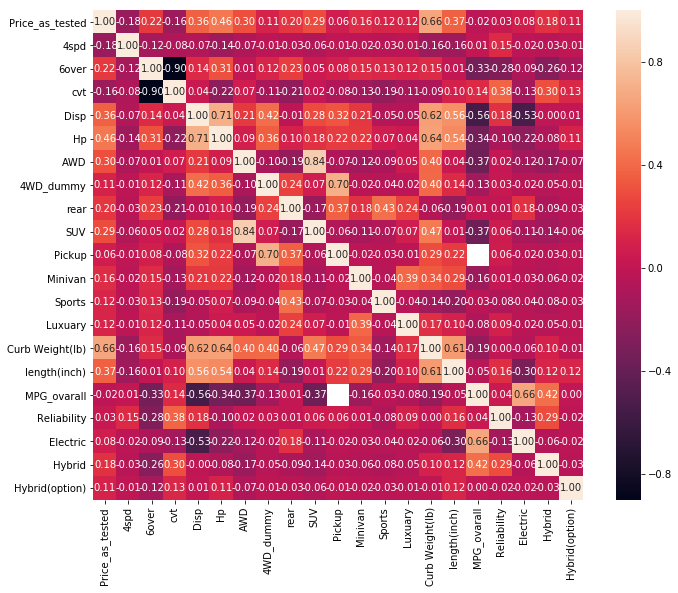

In [15]:
plt.figure(figsize=(12,9))
sns.heatmap(df2.corr(),annot=True, square=True, fmt='.2f')
plt.show()

In [55]:

# split data for training
y_train = df2['Price_as_tested'].values
train = df2.drop(['Price_as_tested'], axis=1)

In [47]:
import math

In [48]:
y_train

array([27545. , 21447.5, 30440. , 26350. , 26350. , 18307.5, 15262.5,
       24900. , 30372.5, 28845. , 26645. , 23397.5, 22445. , 23705. ,
       25697.5, 23662.5, 28715. , 17745. , 17745. , 17745. , 29535. ,
       29535. , 29535. , 26872.5, 29685. , 23745. , 23745. , 23745. ,
       29100. , 29100. , 18855. , 23105. , 16995. , 20650. , 21850. ,
       24875. , 27250. , 27250. , 26687.5, 26687.5, 30867.5, 30867.5,
       25045. , 22795. , 28820. , 21450. , 27670. , 28905. , 16300. ,
       26075. , 29000. , 23262.5, 28090. , 29560. , 21520. , 27547.5,
       26320. , 29947.5, 29100. , 30350. , 25595. , 19945. , 15245. ,
       28095. , 23195. , 28445. , 28445. , 27895. , 19140. , 22400. ,
       28545. , 24640. , 21390. , 13975. , 16850. , 26450. , 29545. ,
       24045. , 29442.5, 21595. , 27070. , 27680. , 23425. , 29222.5,
       29222.5, 20690. , 19220. , 27020. , 22797.5, 30100. , 28217. ,
       30380. , 30380. , 17347.5, 16500. , 26155. , 28540. , 30807.5,
       25965. , 2409

In [49]:
y_train2 = np.log(y_train)

## データの分布を見るためのグラフ。正規分布か右寄りか左寄りかなど。

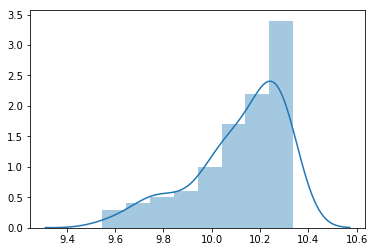

In [50]:
ax = sns.distplot(y_train2)
plt.show()